In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load and Split DataSets

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 52s 0us/step


In [ ]:
# Normalize Pixel values to be between 0 and 1.
train_images, test_images = train_images/255.0, test_images/255.0

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

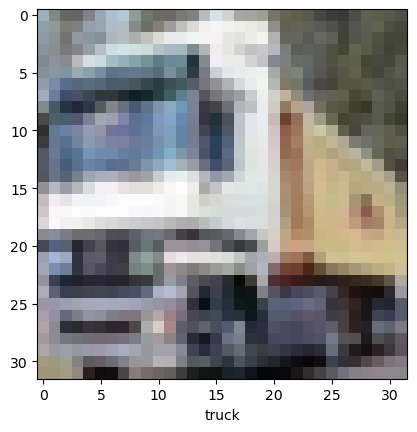

In [ ]:
# Let's look at a one image. We change this to look at other images(img_index = 1, 2, 3 ....)

IMG_INDEX = 1
plt.imshow(train_images[IMG_INDEX], cmap = plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2,2))) # This layer will perform the max pooling operation using 2x2 samples and a stride of 2.
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

model.summary()  # Let's have a look at our model so far



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [ ]:
model.add(layers.Flatten())  # We need to take these extracted features and add a way to classify them. This is why we add the layers to our models.
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# We can see the flatten layer changes the shape of out data so that we can feed it to the 64 modes dense layer,
# followed by the final output, followed by the final output layer of 10 neurons (one for eanh class).

# Now we will train and compile the model using the recommended hyperparameters from tensorflow.
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))


Epoch 1/10


1563/1563 [==============================] - 18s 10ms/step - loss: 1.5716 - accuracy: 0.4247 - val_loss: 1.3049 - val_accuracy: 0.5406
Epoch 2/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1955 - accuracy: 0.5728 - val_loss: 1.0920 - val_accuracy: 0.6114
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0498 - accuracy: 0.6315 - val_loss: 1.0283 - val_accuracy: 0.6335
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9608 - accuracy: 0.6631 - val_loss: 0.9466 - val_accuracy: 0.6714
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8881 - accuracy: 0.6865 - val_loss: 0.9434 - val_accuracy: 0.6718
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8274 - accuracy: 0.7101 - val_loss: 0.9030 - val_accuracy: 0.6922
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7830 - accuracy: 0.7247 - val_loss: 0.961

In [ ]:
# Train on 5000 samples and validate on 10000 samples.

# Evaluate the model ==> We can determine how well the model performed by looking at it's performance on the test data sets.

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)

313/313 - 1s - loss: 0.8981 - accuracy: 0.6963 - 1s/epoch - 4ms/step
0.6963000297546387


In [ ]:
# In this model we get our accrracy ~ 70%. This is okay but surely there is a way to improve on this by pretained model and fine tuning.

# Pre-trained Models and Fine Tunning ==>
A pre-trained model is a machine learning model that has been trained on a large datasets to perform a specific task, such as image classification, natural language processing , or speech recognition. These models are trained on powerful computing infrastructure and extensive labeled data, often using deep learning techniques. The pre-training phase involves exposing the model to a large amount of data, allowing it to learn patterns, features, and representations that are useful for the given task.

During pre-training, the model learns to extract relevant features from the input data and build internal representations that capture the underlying patterns. For example, in the case of image classification model, the pre-trained model learns to recognize shapes, edges, and textures in images. In the case of natural language processing model, it learns to understand sematic realtionships between words and sentences.

Fine Tuning, on the other hand, is a process where a pre-trained model is further trained on a similar, task-specific datasets to adapt it to a particular problem or domain. Fine-tuning helps to transfer the knowledge gained during pre-training to a new, more specific task. Insted of training a model from scratch on the similar dataset, fine-tuning takes advantage of the pre-tuning model's already learned representations and refinees them to fit the new task.

# The fine-tuning process typically involves three steps:
1. Initialization: The pre-trained model is loaded, and its parameters are frozen to preserve the learned representations. Only the final layers or specific parts of the model are modified or replaced to match the requirements of the new task. For example, in an image classification model, the last few layers responsible for predicting class labels are often replaced with new layers.

2. Training: The frozen parameters are then fine-tuned by training the modified model on the task-specific dataset. This involves feeding the new dataset through the model, computing the loss, and updating the model's parameters through backpropagation and gradient descent. The training process adjusts the model's parameters to optimize its performance for the specific task.

3. Fine-tuning allows for faster and more effective training on new tasks , especially when the available tasks-specific data is limited. By leveraging the knowledge encoded in the pre-training model, fine-tuning can achieve better performance and faster convergence compares to training a model from scratch.

In summary, a pre-trained model is a model trained on large dataset for a specific task, while fine-tuning is the process of adapting the pre-trained model to a new task by modifying and training specific parts of the model on a smaller, task-specific dataset.


In [2]:
#NOw we will load the cats vs dogs dataset from the modeule tensorlow_datasets.
#This dataset contains(image,labels)pair
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
#split the data manually into 80% training and 10% testing and 10% validation
(raw_train,raw_validation,raw_test),metadata=tfds.load('cats_vs_dogs',split=['train[:80%]',
                                                                             'train[80%:90%]',
                                                                             'train[90%:]'],
                                                                        with_info = True,
                                                                        as_supervised = True)

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
get_label_name=metadata.features['label'].int2str
#The code you provide is accessing the int2str attributes of the 'label' features in the meta data object.
#metadata: It refers to an object or structure that contains inforamtion about a datasetor the features of a machine learning model.

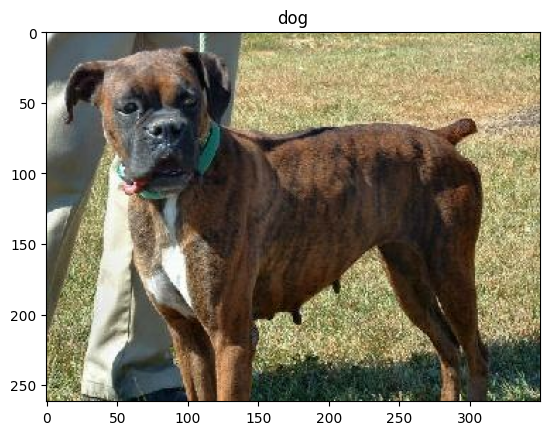

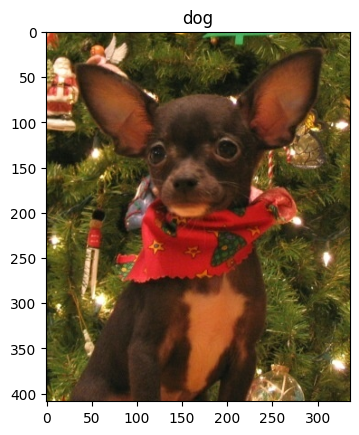

In [5]:
#Create a function object that we can use to get labels.
#Display 2 images from the datasets.
import matplotlib.pyplot as plt
for image,label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [6]:
IMG_SIZE=160 #ALL images will be bresized to 160x160

In [8]:
import tensorflow as tf
IMG_SIZE=160
def format_example(image,label):

  #return an image that is reshaped to IMG_SIZE

  image=tf.cast(image,tf.float32)
  image=(image/127.5)-1
  image=tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
  return image,label

#Now we can apply this function to all our images using map.
train=raw_train.map(format_example)
validation=raw_validation.map(format_example)
test=raw_test.map(format_example)

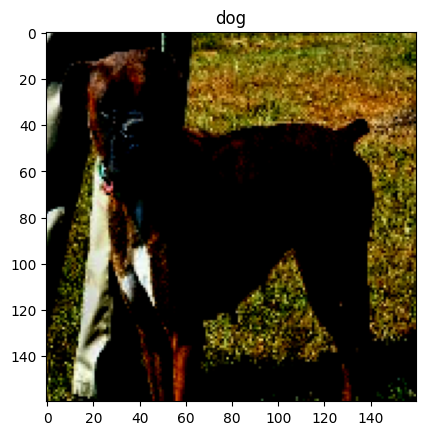

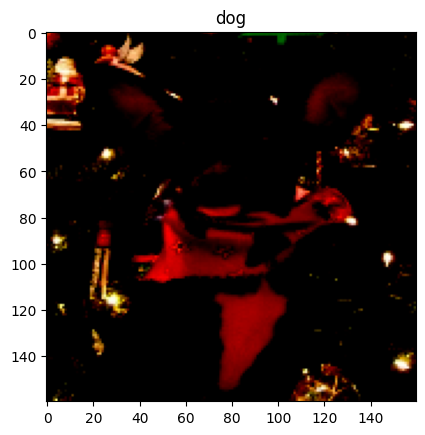

In [10]:
#let's have look at our image now:
for image,label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [11]:
#Now if we look at the shape of an original image vs the new image we wil see it has been changed.

In [12]:
for img , label in raw_train.take(2):
  print("Original Shape:",img.shape)

for img,label in train.take(2):
  print("New Shape:",img.shape)

Original Shape: (262, 350, 3)
Original Shape: (409, 336, 3)
New Shape: (160, 160, 3)
New Shape: (160, 160, 3)


In [13]:
#Picking a Pre-trained Model ==> The model we are going to use as the convolutional base for our model is the
#MobileNet V2 developed at google
#The model to use this trained on 1.4 million images and has 1000 different classes.
#So, when we load in the model we will specify that we don't want to load the top (classification) layer.
#We will tell the model what input shape to extract and to use the predetermine weights from imagenet(Google Dataset).